In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pygaia.photometry import transformations
from pygaia.errors import spectroscopic

import sys
sys.path.append("../code")
import run_set_pygaia

In [12]:
def get_M2_RV_err(mass, G, V_IC):

    # First, get a V magnitude
    G_VC = transformations.gminvFromVmini(V_IC)
    V = G - G_VC

    # Adjust for masses below pyGaia limit
    if mass < 0.67: return spectroscopic.vradErrorSkyAvg(V, 'K4V')
    if mass > 17.5: return spectroscopic.vradErrorSkyAvg(V, 'B0V')

    # Stellar masses from Carol & Ostlie
    # To Do: Check these numbers
    mass_grid = np.array([17.5, 5.9, 2.9, 2.0, 1.6, 1.05, 1.0, 0.79, 0.67])
    str_grid = np.array(['B0V','B5V','A0V','A5V','F0V','G0V','G5V','K0V','K4V'])
    rv_err_grid = np.array([])
    for i, m in enumerate(mass_grid):
        rv_err_tmp = spectroscopic.vradErrorSkyAvg(V, str_grid[i])
        rv_err_grid = np.append(rv_err_grid, rv_err_tmp)

    rv_err_interp = interp1d(mass_grid, rv_err_grid)

    return rv_err_interp(mass)

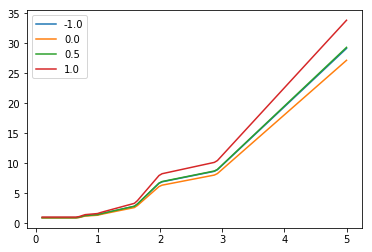

In [13]:
masses = np.linspace(0.1, 5.0, 100)

G = 13.0
V_IC = 0.0


for V_IC in [-1.0, 0.0, 0.5, 1.0]:
    RV_err = np.array([])

    for m in masses:  
        RV_err = np.append(RV_err, get_M2_RV_err(m, G, V_IC))

    plt.plot(masses, RV_err, label=str(V_IC))



plt.legend(loc=2)

plt.show()